,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


,PassengerId,Survived,Age,SibSp,Parch,Fare
0,1,0,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,0,35.0,0,0,8.0500
...,...,...,...,...,...,...
885,886,0,39.0,0,5,29.1250
886,887,0,27.0,0,0,13.0000
887,888,1,19.0,0,0,30.0000
889,890,1,26.0,0,0,30.0000


,PassengerId,Age,SibSp,Parch,Fare
0,892,34.5,0,0,7.8292
1,893,47.0,1,0,7.0000
2,894,62.0,0,0,9.6875
3,895,27.0,0,0,8.6625
4,896,22.0,1,1,12.2875
...,...,...,...,...,...
413,1305,0.0,0,0,8.0500
414,1306,39.0,0,0,108.9000
415,1307,38.5,0,0,7.2500
416,1308,0.0,0,0,8.0500


,PassengerId,Survived,Age,SibSp,Parch,Fare,Age-1
0,1,0,22.0,1,0,7.2500,(20-30)
1,2,1,38.0,1,0,71.2833,(30-40)
2,3,1,26.0,0,0,7.9250,(20-30)
3,4,1,35.0,1,0,53.1000,(30-40)
4,5,0,35.0,0,0,8.0500,(30-40)
...,...,...,...,...,...,...,...
885,886,0,39.0,0,5,29.1250,(30-40)
886,887,0,27.0,0,0,13.0000,(20-30)
887,888,1,19.0,0,0,30.0000,(10-20)
889,890,1,26.0,0,0,30.0000,(20-30)


<AxesSubplot:xlabel='Age-1', ylabel='Survived'>

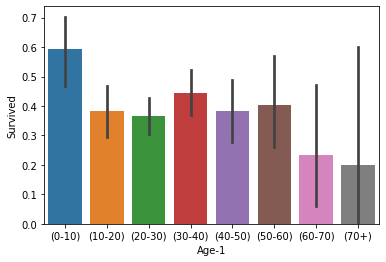

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0)
#Transformar arquivos em dataframe e gerar momentos estatísticos
test = pd.read_csv("../input/titanic/test.csv")
trein = pd.read_csv("../input/titanic/train.csv")
display(test.describe())
display(trein.describe())
#para descobrir o tipo de dado de cada freature
display(test.info())
display(trein.info())
#descobrir quais as Features contém NaN
print(test.isnull().sum())
print(trein.isnull().sum())
testA = test.loc[:,['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare']]
treinA = trein.loc[:,['PassengerId', 'Survived', 'Age', 'SibSp', 'Parch', 'Fare']]
#retirando as linhas que contenham NaN das features do banco de dados de treino
treinA = treinA.dropna()
display(treinA)
#no banco de dados de teste, substituindo os NaN pelo valor 0,
testA = testA.fillna(0)
display(testA)
#Para a Feature “Age”, criar uma nova Feature que a separe em 8 grupos para que se possa utilizar “sns.barplot”.
Age = ['(0-10)', '(10-20)', '(20-30)', '(30-40)', '(40-50)', '(50-60)', '(60-70)', '(70+)']
q = [0,10,20,30,40,50,60,70,np.inf]
treinA['Age-1'] = pd.cut(treinA['Age'],q,labels=Age)
display(treinA)
#graficos com todas as colunas
display(sns.barplot(data=treinA, x='Age-1', y='Survived'))
###analise=Crianças tem maior chance de sobreviver

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

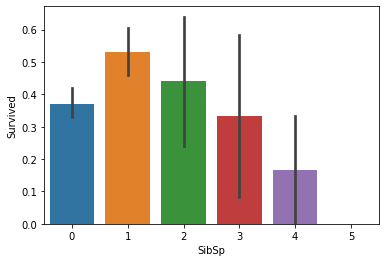

In [2]:
display(sns.barplot(data=treinA, x='SibSp', y='Survived'))
#SibSp 1 tem mais chance de sobreviver

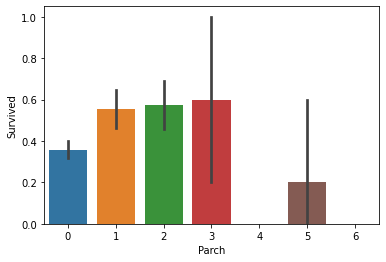

In [3]:
t = sns.barplot(data=treinA, x='Parch', y='Survived')
plt.show(t)
#Parch 3 tem mais chance de sobreviver

In [4]:
#6.3
#Treinamento do modelo e submissão das predições em treino
X = treinA.drop(['Survived','PassengerId', 'Age-1'], axis=1)
display(X)
y = treinA.Survived
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
normalizador = MinMaxScaler()
X_norm = normalizador.fit_transform(X)
X_norm
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, train_size=2/3)
knn2 = KNeighborsClassifier(n_neighbors=23)
knn2.fit(X_train, y_train)
accuracy_score(y_test, knn2.predict(X_test))



,Age,SibSp,Parch,Fare
0,22.0,1,0,7.2500
1,38.0,1,0,71.2833
2,26.0,0,0,7.9250
3,35.0,1,0,53.1000
4,35.0,0,0,8.0500
...,...,...,...,...
885,39.0,0,5,29.1250
886,27.0,0,0,13.0000
887,19.0,0,0,30.0000
889,26.0,0,0,30.0000


0.6554621848739496

In [5]:
display(testA)
#Treinamento do modelo e submissão das predições em todo dataframe de test
testB = testA.drop('PassengerId', axis=1)
gua = test['PassengerId']
pred= knn2.predict(testB)
output = pd.DataFrame({'PassengerId' : gua, 'Survived' : pred})
output.to_csv('submission.csv', index=False)
output.shape
display(output)

,PassengerId,Age,SibSp,Parch,Fare
0,892,34.5,0,0,7.8292
1,893,47.0,1,0,7.0000
2,894,62.0,0,0,9.6875
3,895,27.0,0,0,8.6625
4,896,22.0,1,1,12.2875
...,...,...,...,...,...
413,1305,0.0,0,0,8.0500
414,1306,39.0,0,0,108.9000
415,1307,38.5,0,0,7.2500
416,1308,0.0,0,0,8.0500


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,1
414,1306,1
415,1307,0
416,1308,1
